<a href="https://colab.research.google.com/github/yehuda-yu/Data_Science_Projects/blob/main/Final_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# what are the main differences between good players to bad players?

Here we want to compare between players that have high rating (85+) to players that have low rating (<=70) and check in whitch parameters we can see the differences.


####Do high-rating players have characteristics that differentiate them from low-rating players?
For example, is there a specific skill that affects the difference? Does the fact that a player is right or left matter? Are players with a higher score also working harder or is it a talent that is not significantly dependent on hard work?
We will try to answer these questions and find other interesting patterns.

####How do we do that?

We will create a separate Data Frame for the two groups and perform a T test for each column (character) and thus test whether there is a statistical difference. At the moment we will focus only on those **who have a statistical significance level of 95%**. 

Since we have 41 column, the false positive eror now have probability of $p = 0.05*41$. in order to reduce the eror we will use $\alpha$ 0f $0.05/41$,
whitch means **significance level of 99.87%**.

In [ ]:
df_high = df_fifa[df_fifa['Rating']>=85]
df_low = df_fifa[df_fifa['Rating']<=70]
print("We have ",len(df_high)," players with high rating which is ",round(100*(len(df_high)/len(df_fifa)),3),"% of all players")
print("We have ",len(df_low)," players with low rating which is ",int(100*(len(df_low)/len(df_fifa))),"% of all players")

We have  85  players with high rating which is  0.483 % of all players
We have  12958  players with low rating which is  73 % of all players


In [ ]:
# choose the columns with numeric values to perform t test:
df_high = df_high.select_dtypes("int")
df_low = df_low.select_dtypes("int")

In [ ]:
df_ttest = pd.DataFrame(columns = ["Parameter","P_value","Significant_95%","Significant_99.87%" ]) # df for results

for column in df_high.columns[1:]: #All the columns except the rating
  # create 2 groups:
  group_high = df_high[column]
  group_low = df_low[column]
  t,p = ttest_ind(group_high, group_low) #perform ttest between the groups
  if p <= 0.05:
    if p <= (0.05/41):
      # create raw
      new_row = {'Parameter':column, 'P_value':p,"Significant_95%": "Yes","Significant_99.87%":"Yes"}
    else:
      # create raw
      new_row = {'Parameter':column, 'P_value':p,"Significant_95%": "Yes","Significant_99.87%":"No"}
       
    #append row to the dataframe:
    df_ttest = df_ttest.append(new_row, ignore_index=True)
    
  else:
    # create raw
    new_row = {'Parameter':column, 'P_value':p,"Significant_95%": "No","Significant_99.87%":"No"}
    #append row to the dataframe:
    df_ttest = df_ttest.append(new_row, ignore_index=True)
df_ttest = df_ttest.set_index("Parameter")
df_ttest

,P_value,Significant_95%,Significant_99.87%
Parameter,,,
Height,1.532263e-01,No,No
Weight,2.129638e-04,Yes,Yes
Age,4.796092e-15,Yes,Yes
Work_Rate,7.968191e-12,Yes,Yes
Weak_foot,3.576991e-15,Yes,Yes
Skill_Moves,1.532860e-29,Yes,Yes
Ball_Control,3.652425e-34,Yes,Yes
Dribbling,1.116988e-23,Yes,Yes
Marking,2.477803e-02,Yes,No


### Conclusions:

1. In significant level of 95% There is a **significant difference in almost every parameter** between the players with the high rating and the players with the low rating.
The only parameters that are not significant are related to **abilities to be a goalkeeper**. Makes a lot of sense considering that 10 out of 11 should not develop such skills ... 🤔
In addition, the height also not significantly different.

2. In significant level of 99.87% we have 2 other parameters that are not significant:

  *A. Marking*.

  *B. Sliding_Tackle*

3. **High-rating players are significantly older** than low-rating players (averages 28.6 and 24.6, respectively).

4. Players with a higher overall rate are also significantly more hard workes! Not everything is talent probably ...

## Position Classification - Random forest
Now lets try to predict the position of the player based on his scores in the different categories.

First, we will try a "**Random forset classification**". This model is very usefull for classification problems.
The basic principles behind the model are that it tries to classify the data into different categories with **conditions and probability trees**. The model splits the data into several separate models and actually performs the classification in parallel in several separate "trees". In addition, the model randomly selects **different columns** (features) on which it practices and tries to get a correct result and leaves some of the data aside for validation.

 The advantages of this method are that compared to other models that use probability trees it is a model that has a **lower probability of reaching "overfiting"** but still has to pay attention to this issue (using a data set to be used for the test).

### Preprocessing

1. Choose the relevant columns and create new DataFrame.
2. Feature ingineering
3. Split the data into Train, and Validation sets.
4. Arraange the data to numpy arrays


1. Choose the relevant columns and create new DataFrame:

We will choose all the columns of the scores for the model to train (features), and the "Club_Position" column to be the label. 

❗ Notice that we could chose the "Preffered_Position" to be the label, and assume that there is more correlation to the position the player prefers than certain constraints that can cause him to play in a different position on the team. But we prefered the Club Position because its just 1 categorial option and will be more easy to train the model.

In [ ]:
# import packegas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
features = df_fifa[df_fifa.columns[18:53]] # All the classes with score

# Feature ingineering:
# 1. preefered foot as encode:
features["Preffered_Foot"] = df_fifa["Preffered_Foot"].astype('category')
features["Preffered_Foot"] =features["Preffered_Foot"].cat.codes
# 2. drop columns that reduce the accuracy:
features['Preferred_Position'] = df_fifa_processed2['Preferred_Position'] # add the label column just for drop nan from all
# features = features[features.Club_Position!="Sub"] # neglect the sub column who effect the results
# features = features[features.Club_Position!="Res"] # neglect the reseve column who effect the results

# 3. Clear Nan:
features = features.dropna()

# define labels coluumn
labels = features['Preferred_Position']
features = features.loc[:, features.columns != 'Preferred_Position']  # delete the label column from features
print(labels.unique()) # uncomment to see rhe df
# print(features) # uncomment to see the df

['LW' 'RW' 'ST' 'GK' 'CB' 'CM' 'CAM' 'LM' 'RB' 'RM' 'LB' 'CF' 'CDM' 'LWB'
 'RWB']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
len(features),len(labels)

(17587, 17587)

2. Split the data into Train and Validation sets.

85% - Train

15% - Validation

In [ ]:
train_ratio = 0.85
validation_ratio = 0.15

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_val, y_train, y_val = train_test_split(features,
                                                    labels,
                                                    test_size=1 - train_ratio)
 

print("x train length: ",len(x_train),"\n","x val length: ", len(x_val))

x train length:  14948 
 x val length:  2639


### Model and results
1. define the model and the Hyperparameters
2. Evaluate the model on the test set.

In [ ]:
clf = RandomForestClassifier() # Set the arguments of the classifier
# -------- train-----------------#
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)

print("Training: Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# -------- validation-----------------#
y_val_pred = clf.predict(x_val)

print("Validation: Accuracy:",metrics.accuracy_score(y_val, y_val_pred))


Training: Accuracy: 1.0
Validation: Accuracy: 0.7442212959454338


Present the results with confusion matrix:

Text(0.5, 1.0, 'Confusion matrix - 0.744 accuracy')

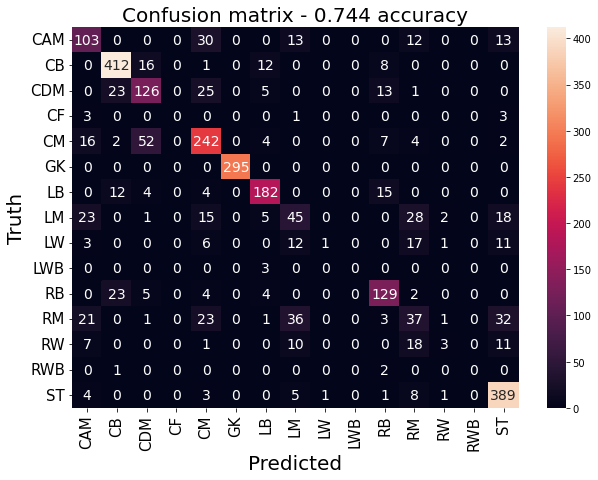

In [ ]:
# labels to confiusion matrix:
unique_label = np.unique([y_val, y_val_pred])

# df of confiusion matrix:
cmtx = pd.DataFrame(
    confusion_matrix(y_val, y_val_pred, labels=unique_label), 
    index=[x for x in unique_label], 
    columns=[x for x in unique_label])
plt.figure(figsize = (10,7))
sns.heatmap(cmtx, annot=True, fmt='d',annot_kws={"size": 14})
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('Truth', fontsize = 20)
plt.xticks(fontsize =15,rotation=90)
plt.yticks(fontsize =15,rotation=0)
plt.title(f'Confusion matrix - {round(metrics.accuracy_score(y_val, y_val_pred),3)} accuracy', fontsize = 20)
# plt.savefig("/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/Final_project_FIFA/Charts_presentation/" + 'Confusion_matrix1.png',bbox_inches = "tight")

F1 score table:

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_val_pred, average=None) #f1 score to each label
# df with f1 score
df_score =pd.DataFrame(index = np.unique([y_val])) 
df_score['F1_Score'] = f1
df_score.to_excel("/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/Final_project_FIFA/Charts_presentation/f1score1.xlsx")
df_score

,F1_Score
CAM,0.586895
CB,0.893709
CDM,0.633166
CF,0.000000
CM,0.708638
GK,1.000000
LB,0.840647
LM,0.347490
LW,0.037736
LWB,0.000000


## Position Classification - Neural Network Model

In [ ]:
# Define X (features) and Y (labels):
X = features
Y = labels

In [ ]:
# multi-class classification with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
 
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=36, activation='relu')) #layers for the network
	model.add(Dense(29, activation='softmax'))  #layers for the network
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

## Posision Classification - Field  Preffered Position 

Now lets perform the models on the column that we create "Field_Preffered_Position". We assume that this model will perform better results because it has less features.

In [ ]:
features = df_fifa[df_fifa.columns[18:53]] # All the classes with score
# Clear Nan:
features["Field_Preffered_Position"] = df_fifa["Field_Preffered_Position"] # add the label column just for drop nan from all
print(f"data before delete Nan = {len(features)} samples")
features = features[features!='nan'] #delete nan
features = features.dropna() #delete nan
print(f"data after delete Nan = {len(features)} samples")
# define labels coluumn
labels = features["Field_Preffered_Position"]
features = features.loc[:, features.columns != 'Field_Preffered_Position']  # delete the label column from features
labels = labels.dropna() #delete nan
print(labels.unique()) # uncomment to see rhe df
# print(features) # uncomment to see rhe df

data before delete Nan = 17588 samples
data after delete Nan = 17587 samples
['attacking' 'goalkeeper' 'defensive' 'midfield']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
len(features),len(labels)

(17587, 17587)

In [ ]:
train_ratio = 0.85
validation_ratio = 0.15

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_val, y_train, y_val = train_test_split(features,
                                                    labels,
                                                    test_size=1 - train_ratio)
 

print("x train length: ",len(x_train),"\n","x val length: ", len(x_val))

x train length:  14948 
 x val length:  2639


In [ ]:
clf = RandomForestClassifier() # Set the arguments of the classifier
# -------- train-----------------#
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)

print("Training: Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# -------- validation-----------------#

y_val_pred = clf.predict(x_val)

print("Validation: Accuracy:",metrics.accuracy_score(y_val, y_val_pred))



Training: Accuracy: 1.0
Validation: Accuracy: 0.9018567639257294


In [ ]:
# -------- Cross validation-----------------#
scores = cross_val_score(clf, features, labels, cv=10)
print("Cross validation results: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation results: 0.89 accuracy with a standard deviation of 0.01


Text(0.5, 1.0, 'Confusion matrix - 0.902 accuracy')

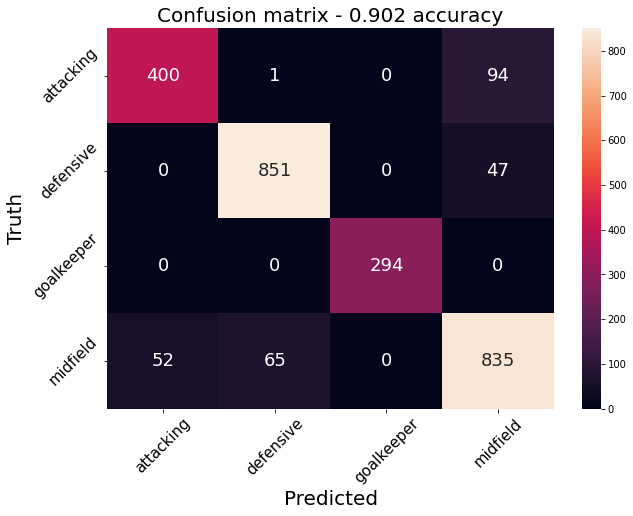

In [ ]:
# labels to confiusion matrix:
unique_label = np.unique([y_val, y_val_pred])

# df of confiusion matrix:
cmtx = pd.DataFrame(
    confusion_matrix(y_val, y_val_pred, labels=unique_label), 
    index=[x for x in unique_label], 
    columns=[x for x in unique_label])
plt.figure(figsize = (10,7))
sns.heatmap(cmtx, annot=True, fmt='d',annot_kws={"size": 18})
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('Truth', fontsize = 20)
plt.xticks(fontsize =15,rotation=45)
plt.yticks(fontsize =15,rotation=45)
plt.title(f'Confusion matrix - {round(metrics.accuracy_score(y_val, y_val_pred),3)} accuracy', fontsize = 20)
# plt.savefig("/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/Final_project_FIFA/Charts_presentation/" + 'Confusion_matrix2.png',bbox_inches = "tight")

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_val_pred, average=None) #f1 score to each label
# df with f1 score
df_score =pd.DataFrame(index = np.unique([y_val])) 
df_score['F1_Score'] = f1
df_score

,F1_Score
attacking,0.844773
defensive,0.937741
goalkeeper,1.000000
midfield,0.866183


### Feature importence

In [ ]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    clf, x_val, y_val, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=features.columns)

Elapsed time to compute the importances: 35.512 seconds


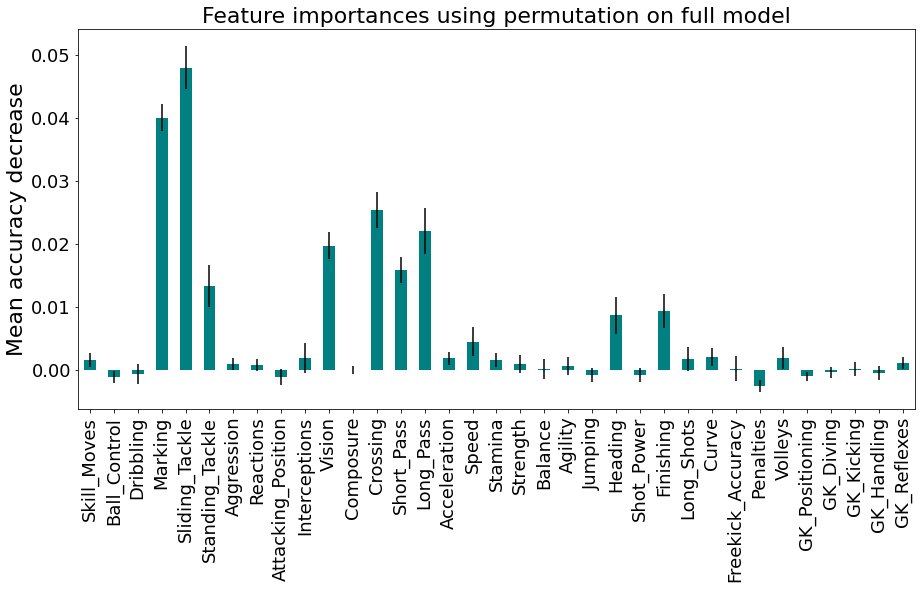

In [ ]:
fig, ax = plt.subplots(figsize = (15,7))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax,color = "teal")
ax.set_title("Feature importances using permutation on full model",fontsize = 22)
ax.set_ylabel("Mean accuracy decrease",fontsize = 22)
# We change the fontsize of minor ticks label 
# ax.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
# fig.tight_layout()
plt.savefig("/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/Final_project_FIFA/Charts_presentation/" + 'Feature_impotrence.png',bbox_inches = "tight")

## Neural Network

In [ ]:
# Define X (features) and Y (labels):
X = features
Y = labels

In [ ]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
 
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=35, activation='relu')) #layers for the network
	model.add(Dense(8,activation='relu')) #layers for the network
	model.add(Dense(8,activation='relu')) #layers for the network
	model.add(Dense(4, activation='softmax'))  #layers for the network different activation function
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

	return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=5, verbose=0)
# estimator.save("/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/Final_project_FIFA/NN_clasiffication_")
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

